# OWL Glicko ratings
=================================

This Notebook helps plotting rating histories of specific OWL teams.

The `import OWL_Glicko as og` line executes the OWL_Glicko.py script, which loads match data from the OWL API and rates the teams with the Glicko2 rating algorithm. But it does not generate output (plots, txt).
Results are loaded and accessible here.


In [2]:
import OWL_Glicko as og

In [3]:
%matplotlib notebook

`data` is a dictionary containing all loaded data in json-style format.
I wouldn't say it is intuitive but maybe it helps someone interested in using the API.

If you are interested how the API was accessed look in the OWL_Glicko.py file.

In [24]:
data = og.data # dictionary containing all loaded data in jso-style format
# example 
T1 = data['stages'][1]['weeks'][2]['matches'][1]['competitors'][0]['name']
T2 = data['stages'][1]['weeks'][2]['matches'][1]['competitors'][1]['name']
score = str(data['stages'][1]['weeks'][2]['matches'][1]['scores'][0]['value'])+':'\
       +str(data['stages'][1]['weeks'][2]['matches'][1]['scores'][1]['value'])
print( T1+' '+score+' '+T2)

San Francisco Shock 4:0 Toronto Defiant


----------------
`teams` is a dictionary where the OWL team names are the keys. The values are themselves dictionaries containing

*`glicko2`: Player object from glicko2.py

*`latest_matches`: tuple of 3 lists  (opponent's rating, opponent's rd, (Bool) win), the lists are emptied upon updating the rating, so if they are empty all is good.

*`rating_hist`: list of ratings after each week (rating period)

*`rd_hist`: list of rds (rating deviations) after each week

*`color`: hex color code taken from 'primary color' in the OWL API, however many colors seem weird, e.g. San Francisco Shock's is grey for some reason.

In [26]:
teams = og.teams

In [34]:
# example
teamname = 'Dallas Fuel'
first5ratings = teams[teamname]['rating_hist'][:5]
print('rating over the first 4 weeks: {}'.format(first5ratings))

rating over the first 4 weeks: [1500, 1500.0, 1523.9057753198513, 1587.8626052676345, 1639.388425613818]


In the cell below a ratings over time plot is generated, with an emphasis on a specific team that can be chosen at top

<IPython.core.display.Javascript object>


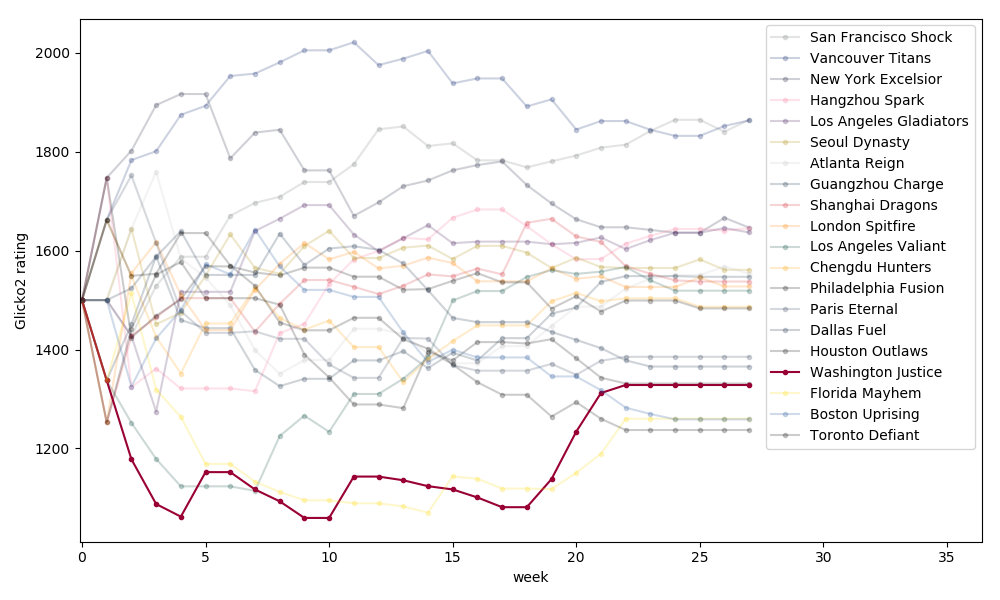

In [43]:
## CHOOSE TEAM HERE
TeamName = 'Washington Justice'
# plot ratings for each weak
names = sorted(teams, key=lambda x: teams[x]['glicko2'].rating, reverse=True)
fig = og.plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
for name in names:
    if name == TeamName:
        alpha = 1.0
    else:
        alpha = 0.2
    plotlist = teams[name]['rating_hist']
    ax.plot(plotlist, '.-', color=teams[name]['color'], label=name, alpha=alpha)
ax.set(xlim=(-0.1, len(plotlist)*1.3))
ax.legend()
ax.set(ylabel='Glicko2 rating', xlabel='week')
fig.tight_layout()